In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# load the data file
df = pd.read_csv('TaxiData.csv')

Q3.a Fare and Tip Distribution

(a) Create histograms and box plots for both fare and tip amounts.

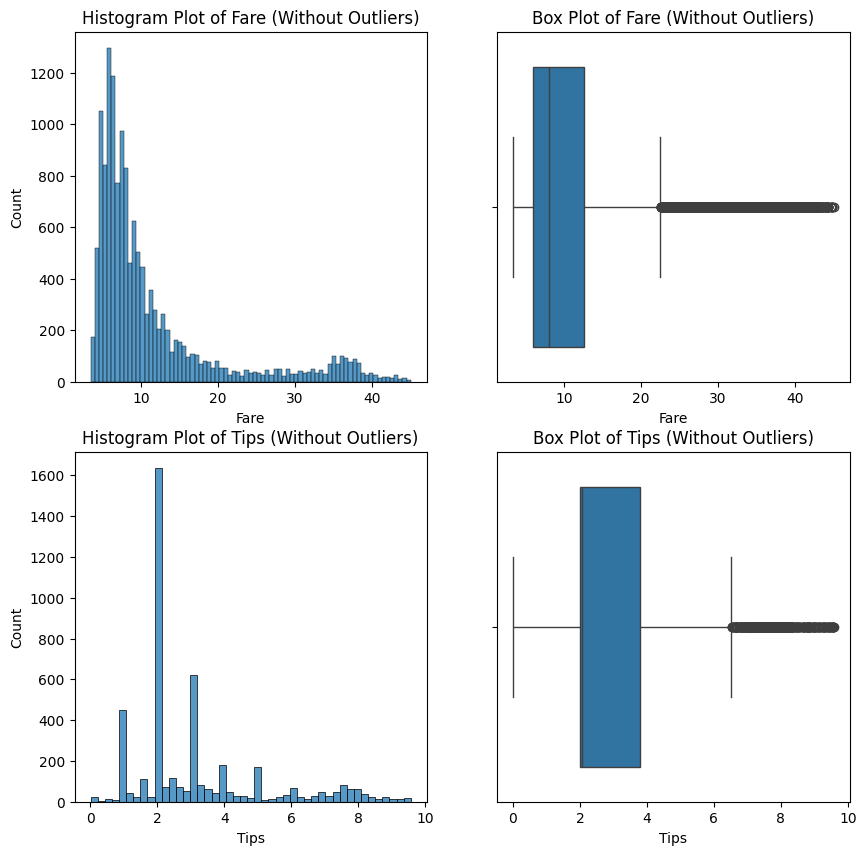

In [38]:
fare_lower_bound = df['fare'].quantile(0.01)
fare_upper_bound = df['fare'].quantile(0.99)

fare_no_outliers = df['fare'][(df['fare'] > fare_lower_bound) & (df['fare'] < fare_upper_bound)]

# plot the histogram and box plot as subplots
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)

# draw the histogram for fare 
sns.histplot(fare_no_outliers)
# sns.histplot(df['fare'], bins=100)
plt.xlabel('Fare')
plt.title('Histogram Plot of Fare (Without Outliers)')

plt.subplot(2, 2, 2)
# draw the box plot for fare
sns.boxplot(x=fare_no_outliers)
plt.xlabel('Fare')
plt.title('Box Plot of Fare (Without Outliers)')

tips_lower_bound = df['tips'].quantile(0.01)
tips_upper_bound = df['tips'].quantile(0.99)

tips_no_outliers = df['tips'][(df['tips'] > tips_lower_bound) & (df['tips'] < tips_upper_bound)]

plt.subplot(2, 2, 3)

# draw the histogram for tips 
sns.histplot(tips_no_outliers)
# sns.histplot(df['tips'], bins=100)
plt.xlabel('Tips')
plt.title('Histogram Plot of Tips (Without Outliers)')

plt.subplot(2, 2, 4)

# draw the box plot for tips
sns.boxplot(x=tips_no_outliers)
plt.xlabel('Tips')
plt.title('Box Plot of Tips (Without Outliers)')

plt.show()


(b) Identify the range, outliers, and any clusters in the data.

In [4]:
# Calculate the range of fare
print(f"Range of fare: {fare_lower_bound} - {fare_upper_bound} = {fare_upper_bound - fare_lower_bound}")


# Calculate the outliers of fare
fare_outliers = df['fare'][(df['fare'] < fare_lower_bound) | (df['fare'] > fare_upper_bound)]
print(f"Outliers of fare:\n{fare_outliers}")

Range of fare: 3.25 - 45.25 = 42.0
Outliers of fare:
1         0.00
10       47.65
14        3.05
18        0.00
25       46.85
         ...  
14480    88.05
14522    51.25
14537    58.25
14908     0.01
14912     0.00
Name: fare, Length: 190, dtype: float64


For better understanding of the outliers, we can plot a histogram. We observe majority of outliers lie below fare_lower_bound.

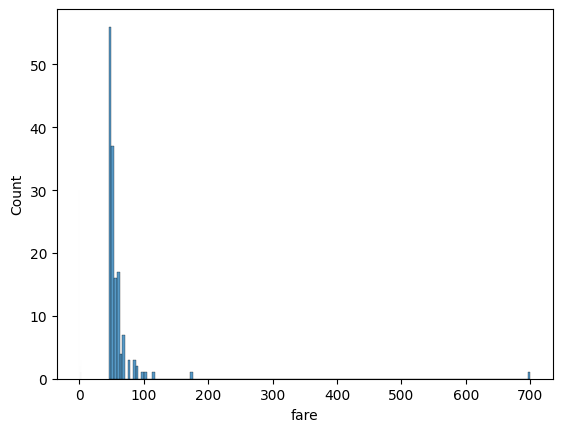

In [5]:
sns.histplot(df['fare'][df['fare'] > fare_upper_bound])
sns.histplot(df['fare'][df['fare'] < fare_lower_bound])
plt.show()

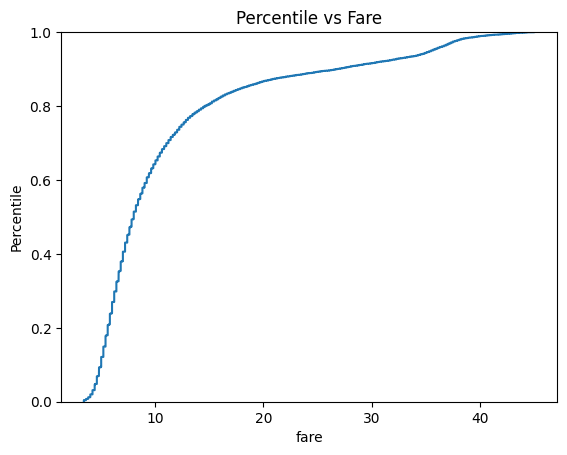

In [73]:
sns.ecdfplot(fare_no_outliers)
plt.title('Percentile vs Fare')
plt.ylabel('Percentile')
plt.show()

We observe that majority of the values of fare lie between 4-12. This is the biggest cluster(by size) in the fare column.

In [6]:
# Calculate the range of tips
print(f"Range of tips: {tips_lower_bound} - {tips_upper_bound} = {tips_upper_bound - tips_lower_bound}")


# Calculate the outliers of tips
tips_outliers = df['tips'][(df['tips'] < tips_lower_bound) | (df['tips'] > tips_upper_bound)]
print(f"Outliers of tips:\n{tips_outliers}")

Range of tips: 0.0 - 9.6 = 9.6
Outliers of tips:
116      12.55
670       9.90
898       9.65
1082      9.85
1370     14.30
         ...  
13974    10.05
14003    10.00
14022    10.06
14413    15.00
14761    10.20
Name: tips, Length: 150, dtype: float64


In [7]:
print(df['tips'][df['tips'] < tips_lower_bound])
print('------------------------------------')
print(df['tips'][df['tips'] > tips_upper_bound])


Series([], Name: tips, dtype: float64)
------------------------------------
116      12.55
670       9.90
898       9.65
1082      9.85
1370     14.30
         ...  
13974    10.05
14003    10.00
14022    10.06
14413    15.00
14761    10.20
Name: tips, Length: 150, dtype: float64


We observe there are no outliers below tips_lower_bound. To better understand outliers, let's plot the outliers above tips_upper_bound using a histogram.

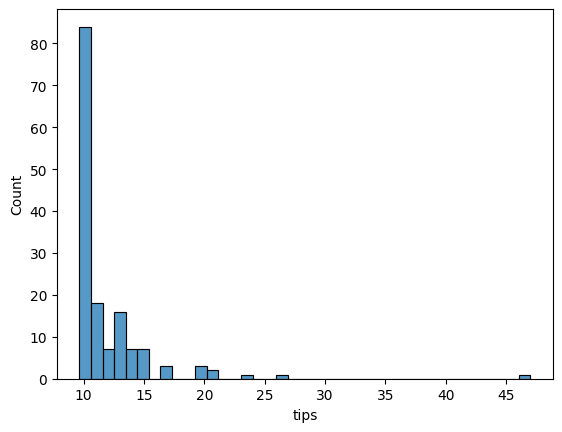

In [8]:
sns.histplot(df['tips'][df['tips'] > tips_upper_bound])
plt.show()

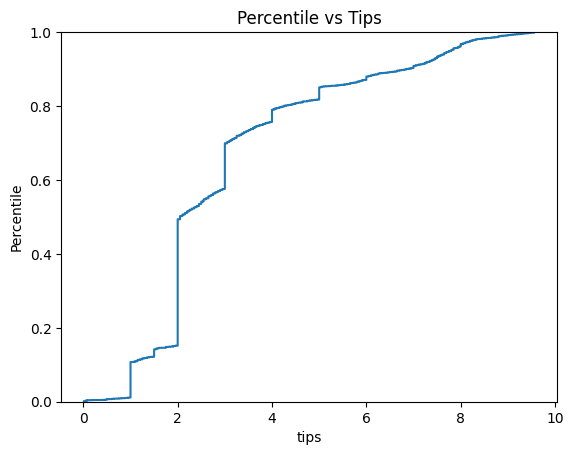

In [77]:
sns.ecdfplot(tips_no_outliers)
plt.title('Percentile vs Tips')
plt.ylabel('Percentile')
plt.show()

From the Percentile vs Tips plot, we can clearly observe that there is a huge cluster of values around the peak value 2. 

In [13]:
# Statistical summary for fare
fare_mean = df['fare'].mean()
fare_median = df['fare'].median()
fare_std = df['fare'].std()
fare_IQR = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)

print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Standard Deviation: {fare_std}, IQR: {fare_IQR}")

print('-----------------------------------------------------------------------------------------------')

# Statistical summary for tips
tips_mean = df['tips'].mean()
tips_median = df['tips'].median()
tips_std = df['tips'].std()
tips_IQR = df['tips'].quantile(0.75) - df['tips'].quantile(0.25)

print(f"Tips - Mean: {tips_mean}, Median: {tips_median}, Standard Deviation: {tips_std}, IQR: {tips_IQR}")

Fare - Mean: 11.768216237834956, Median: 7.85, Standard Deviation: 11.538850470754118, IQR: 6.6
-----------------------------------------------------------------------------------------------
Tips - Mean: 1.0766744434075455, Median: 0.0, Standard Deviation: 2.1583404234827888, IQR: 2.0


Clusters in fare and tips have been mentioned in the previous part.

3.b Payment Method Insights

Visualizing the frequency of each payment method using a pie chart

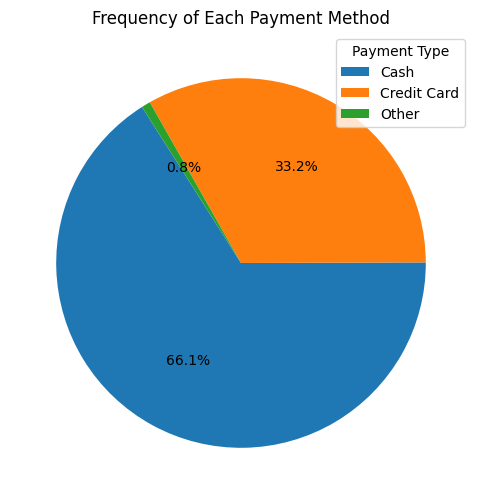

In [46]:
payment_counts = df['payment_type'].value_counts()

total_count = payment_counts.sum()
threshold = 0.01 * total_count
payment_counts = payment_counts[payment_counts >= threshold]
other_count = total_count - payment_counts.sum()

if other_count > 0:
    payment_counts['Other'] = other_count

# Plot the pie chart without individual labels
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=None, autopct='%1.1f%%', startangle=0.34 * 360)
plt.title('Frequency of Each Payment Method')

# Add a legend in the upper right corner
plt.legend(payment_counts.index, title="Payment Type", loc="upper right")
plt.show()

Identify any dominant payment methods and discuss how this may impact service providers:

The payment method of cash dominates any other payment method by a huge margin. The dominance of cash transactions requires investment in secure cash handling systems—such as safes, frequent cash pickups, and procedures for counting cash. Staff training becomes essential to manage cash securely and efficiently, which can increase overhead costs.

3.c Tips by Payment Method

Create a box plot to compare tips across different payment methods

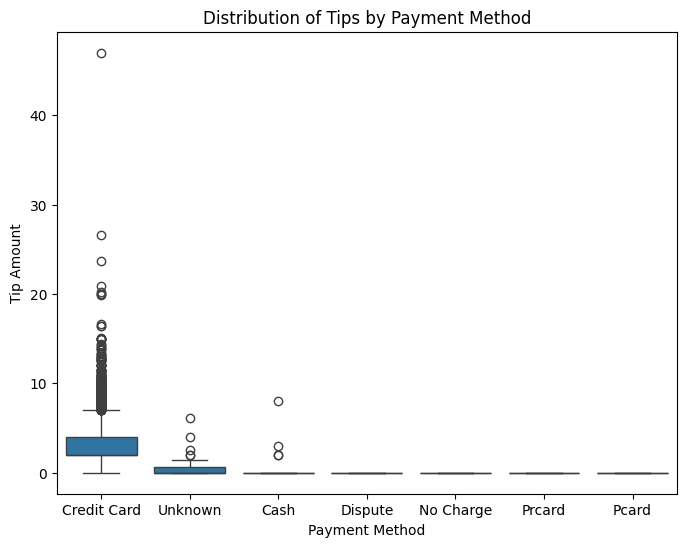

In [23]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='payment_type', y='tips')
plt.title('Distribution of Tips by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.show()

In [25]:
# Calculate the average tip by payment method
average_tips = df.groupby('payment_type')['tips'].mean()
print(average_tips)

payment_type
Cash           0.001519
Credit Card    3.239668
Dispute        0.000000
No Charge      0.000000
Pcard          0.000000
Prcard         0.000000
Unknown        0.685172
Name: tips, dtype: float64


The average tip for credit card payments is around 3.24, which is much higher than any other method. This could suggest that customers paying by card find it easier or more convenient to add a tip. The average tip for cash is extremely low at approximately 0.0015, despite the expectation that cash tips would be higher(due to lack of small denominations, customers round up the charge). The other known methods of payment have no tips at all.

3.d Fare VS Distance

Plot a scatter plot showing the relationship between trip distance and fare

In [30]:
# remove outliers in the trip_distance column
trip_distance_lower_bound = df['trip_miles'].quantile(0.01)
trip_distance_upper_bound = df['trip_miles'].quantile(0.99)

trip_distance_no_outliers = df['trip_miles'][(df['trip_miles'] > trip_distance_lower_bound) & (df['trip_miles'] < trip_distance_upper_bound)]

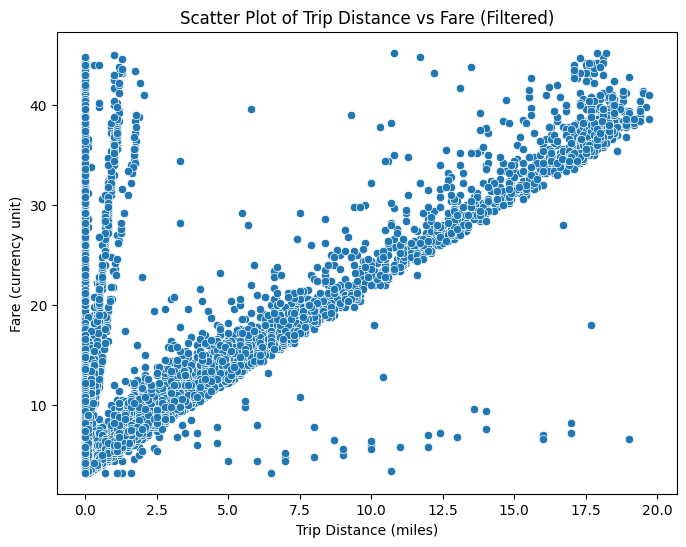

In [32]:
# Filter the DataFrame
filtered_df = df[
    (df['fare'] >= fare_lower_bound) & (df['fare'] <= fare_upper_bound) &
    (df['trip_miles'] >= trip_distance_lower_bound) & (df['trip_miles'] <= trip_distance_upper_bound)
]

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='trip_miles', y='fare')
plt.title('Scatter Plot of Trip Distance vs Fare (Filtered)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare (currency unit)')
plt.show()

Calculate and interpret the correlation coefficient between the two variables.

In [33]:
# Calculate the correlation coefficient between trip_miles and fare
correlation = filtered_df['trip_miles'].corr(filtered_df['fare'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7282845933118118


A correlation coefficient of 0.73 between trip_miles and fare indicates a moderately strong positive relationship. This implies that trip distance is a significant factor influencing fare, but not the only one.

Explain any findings on the fare-distance relationship and outline any potential implications for fare pricing.

Since distance has a strong influence on fare, a distance-based pricing model remains valid. However, given the moderate correlation, distance alone may not sufficiently capture the true fare for a trip. A hybrid pricing model that incorporates additional variables such as trip duration, peak hours, and other factors would offer a more accurate fare calculation.